<a href="https://colab.research.google.com/github/ultralegendshubh/Brain_Tumor_Classification_-MRI-/blob/main/Brain_Tumor_Classification_(MRI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install kaggle

In [38]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [39]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 85% 74.0M/86.8M [00:00<00:00, 193MB/s]
100% 86.8M/86.8M [00:00<00:00, 158MB/s]


In [40]:
from zipfile import ZipFile

In [41]:
# extractinig the compressed images

dataset = "/content/brain-tumor-classification-mri.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [42]:
!ls

brain-tumor-classification-mri.zip  kaggle.json  sample_data  Testing  Training


In [44]:
# import the dependancies


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split






In [45]:
for dirpath,dirnames,filenames in os.walk("/content/Testing"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

there are 4 directories and 0 images in '/content/Testing
there are 0 directories and 74 images in '/content/Testing/pituitary_tumor
there are 0 directories and 115 images in '/content/Testing/meningioma_tumor
there are 0 directories and 105 images in '/content/Testing/no_tumor
there are 0 directories and 100 images in '/content/Testing/glioma_tumor


In [46]:
for dirpath,dirnames,filenames in os.walk("/content/Training"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

there are 4 directories and 0 images in '/content/Training
there are 0 directories and 827 images in '/content/Training/pituitary_tumor
there are 0 directories and 822 images in '/content/Training/meningioma_tumor
there are 0 directories and 395 images in '/content/Training/no_tumor
there are 0 directories and 826 images in '/content/Training/glioma_tumor


In [47]:
# Assign test, train dir


test_dir = "/content/Testing"
train_dir = "/content/Training"

In [50]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [59]:
# lets view the images randomly

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir + '/' + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"image shape : {img.shape}")

  return img

image shape : (512, 512, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

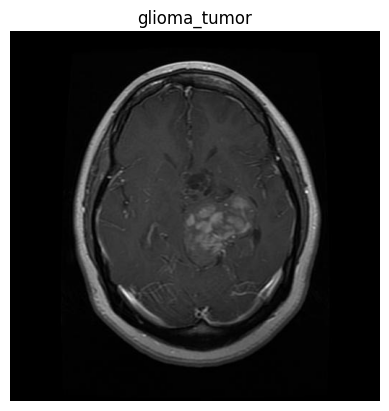

In [62]:
view_random_image(target_dir = train_dir,
                  target_class = random.choice(class_names))

In [67]:
# processing the data


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(
                                               train_dir,
                                               target_size =(224,224),
                                               batch_size = 32,
                                               class_mode = "categorical"
)

test_data = test_datagen.flow_from_directory(
                                              test_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = "categorical"
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
# Creating the model